In [345]:
%matplotlib inline
import numpy as np
import pandas as pd

### Read and explore the dataset.  ( Rename column, plot histograms, find data characteristics)

In [346]:
names = ['user_id', 'prod_id', 'rating', 'timestamp']

Product_ratingsDF = pd.read_csv('ratings_Electronics.csv', names = names)

In [347]:
Product_ratingsDF.head(5)

,user_id,prod_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [348]:
n_users = Product_ratingsDF.user_id.unique().shape[0]

In [349]:
n_items = Product_ratingsDF.prod_id.unique().shape[0]

In [350]:
print (str(n_users) + ' users')
print (str(n_items) + ' items')

4201696 users
476002 items


In [351]:
summary = Product_ratingsDF.describe(include = 'all')
summary = summary.transpose()

summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,7824482,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prod_id,7824482,476002,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7.82448e+06,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5
timestamp,7.82448e+06,NaN,NaN,NaN,1.33818e+09,6.90043e+07,9.1273e+08,1.31535e+09,1.36106e+09,1.38612e+09,1.40607e+09


### Finding out missing values per column

In [352]:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (Product_ratingsDF.apply(num_missing, axis=0))

Missing values per column:
user_id      0
prod_id      0
rating       0
timestamp    0
dtype: int64


In [353]:
pd1 = Product_ratingsDF.groupby(['user_id'],as_index=False).prod_id.agg(['count'])


In [354]:
pd2 = pd1.sort_values('count',ascending = False).reset_index()
pd2.head(15)

,user_id,count
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406
5,A1ODOGXEYECQQ8,380
6,A36K2N527TXXJN,314
7,A2AY4YUOX2N1BQ,311
8,AWPODHOB4GFWL,308
9,A25C2M3QF9G7OQ,296


In [355]:
keys = ['user_id']
i1 = Product_ratingsDF.set_index(keys).index
i1
i2 = pd2.head(15).set_index(keys).index
df_treated = Product_ratingsDF[i1.isin(i2)]
df_treated.head(15)


,user_id,prod_id,rating,timestamp
2162,A5JLAU2ARJ0BO,1400532655,1.0,1291334400
5195,A36K2N527TXXJN,9800359788,5.0,1367280000
5932,ADLVFFE4VBT8,9981719005,3.0,1238716800
7748,A680RUE1FDO8B,B000001OMI,5.0,1227744000
8732,A6FIAB28IS79,B00000J05A,3.0,985564800
10394,AWPODHOB4GFWL,B00000J1QS,4.0,1241740800
11018,A6FIAB28IS79,B00000J1UQ,5.0,1251763200
12680,A6FIAB28IS79,B00000J4CY,3.0,1199404800
16376,AWPODHOB4GFWL,B00000JGNB,4.0,1119484800
16528,A3OXHLG6DIBRW8,B00000JHX1,4.0,1253232000


[Text(0,0,'A5JLAU2ARJ0BO'),
 Text(0,0,'A36K2N527TXXJN'),
 Text(0,0,'ADLVFFE4VBT8'),
 Text(0,0,'A680RUE1FDO8B'),
 Text(0,0,'A6FIAB28IS79'),
 Text(0,0,'AWPODHOB4GFWL'),
 Text(0,0,'A3OXHLG6DIBRW8'),
 Text(0,0,'A22CW0ZHY3NJH8'),
 Text(0,0,'A3EXWV8FNSSFL6'),
 Text(0,0,'A38RMU1Y5TDP9'),
 Text(0,0,'A3LGT6UZL99IW1'),
 Text(0,0,'A1ODOGXEYECQQ8'),
 Text(0,0,'A2AY4YUOX2N1BQ'),
 Text(0,0,'A25C2M3QF9G7OQ'),
 Text(0,0,'ARBKYIVNYWK3C')]

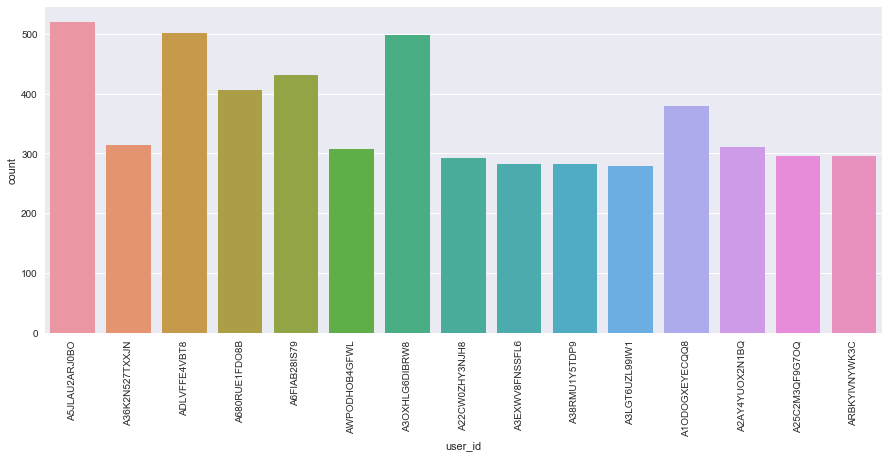

In [356]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,6)})
countplot = sns.countplot(x="user_id", data=df_treated);
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90)

### Take subset of dataset to make it less sparse/more dense. ( For example, keep the users only who has given 50 or more number of ratings )

In [357]:
pd3 = pd2[pd2["count"]>=50]

In [358]:
keys = ['user_id']
i3 = Product_ratingsDF.set_index(keys).index
i4 = pd3.set_index(keys).index
df_treated1 = Product_ratingsDF[i3.isin(i4)].reset_index(drop=True)
df_treated1.head(15)

,user_id,prod_id,rating,timestamp
0,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
1,AT09WGFUM934H,0594481813,3.0,1377907200
2,A32HSNCNPRUMTR,0970407998,1.0,1319673600
3,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
4,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
5,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
6,A2Y4H3PXB07WQI,0972683275,4.0,1292457600
7,A25RTRAPQAJBDJ,0972683275,5.0,1329523200
8,A3LDPF5FMB782Z,1400501466,5.0,1336003200
9,A1A5KUIIIHFF4U,1400501466,1.0,1332547200


In [359]:
df_treated1[df_treated1['timestamp'] == 1390176000].head()

,user_id,prod_id,rating,timestamp
0,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
2304,A2C8I2RQ0WG940,B00005QIZ8,5.0,1390176000
4623,A2IIAQ7VVAHXTD,B00007E7K1,5.0,1390176000
12235,A2IIAQ7VVAHXTD,B0007MWE28,5.0,1390176000
14256,A2IIAQ7VVAHXTD,B000AAZQJU,4.0,1390176000


### As user_id and prod_id are alphanumeric I am using scikit learn LabelEncoder to encode the values into integers so that it is easier to form matrix.

In [365]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_treated1["user_id_enc"] = lb_make.fit_transform(df_treated1["user_id"])
df_treated1[["user_id", "user_id_enc"]].head(11)

,user_id,user_id_enc
0,A3BY5KCNQZXV5U,942
1,AT09WGFUM934H,1461
2,A32HSNCNPRUMTR,850
3,A17HMM1M7T9PJ1,82
4,A3CLWR1UUZT6TG,950
5,A3TAS1AG6FMBQW,1148
6,A2Y4H3PXB07WQI,797
7,A25RTRAPQAJBDJ,467
8,A3LDPF5FMB782Z,1050
9,A1A5KUIIIHFF4U,125


In [366]:
df_treated1["prod_id_enc"] = lb_make.fit_transform(df_treated1["prod_id"])
df_treated1[["prod_id", "prod_id_enc"]].head(11)

,prod_id,prod_id_enc
0,0594451647,0
1,0594481813,1
2,0970407998,2
3,0970407998,2
4,0972683275,3
5,0972683275,3
6,0972683275,3
7,0972683275,3
8,1400501466,4
9,1400501466,4


In [367]:
df_treated1[df_treated1['user_id_enc'] == 0].head(10)

,user_id,prod_id,rating,timestamp,user_id_enc,prod_id_enc
1228,A100UD67AHFODS,B00004Z5M1,5.0,1350086400,0,663
2489,A100UD67AHFODS,B00005T3X7,5.0,1354665600,0,1307
3361,A100UD67AHFODS,B000069EUW,5.0,1351814400,0,1768
3377,A100UD67AHFODS,B000069JWX,1.0,1070841600,0,1776
7122,A100UD67AHFODS,B0000AR0I4,5.0,1353369600,0,3648
8403,A100UD67AHFODS,B0001D3K8A,5.0,1150588800,0,4332
9241,A100UD67AHFODS,B000233WJ6,5.0,1369267200,0,4770
9969,A100UD67AHFODS,B0002HJGUQ,5.0,1360454400,0,5135
10254,A100UD67AHFODS,B0002KVQBA,5.0,1360886400,0,5310
10598,A100UD67AHFODS,B0002SQ2P2,5.0,1150588800,0,5438


In [368]:
df_treated1[df_treated1['prod_id_enc'] == 3].head(5)

,user_id,prod_id,rating,timestamp,user_id_enc,prod_id_enc
4,A3CLWR1UUZT6TG,0972683275,5.0,1373587200,950,3
5,A3TAS1AG6FMBQW,0972683275,5.0,1353456000,1148,3
6,A2Y4H3PXB07WQI,0972683275,4.0,1292457600,797,3
7,A25RTRAPQAJBDJ,0972683275,5.0,1329523200,467,3


In [369]:
index = df_treated1.loc[df_treated1['user_id'] == 'AZNUHQSHZHSUE', 'user_id_enc'].head(1).item()
index

1538

In [370]:
n_users1 = df_treated1.user_id.unique().shape[0]

In [371]:
n_items1 = df_treated1.prod_id.unique().shape[0]

In [372]:
print (str(n_users1) + ' users')
print (str(n_items1) + ' items')

1540 users
48190 items


In [373]:
n_users2 = df_treated1.user_id_enc.unique().shape[0]
n_items2 = df_treated1.prod_id_enc.unique().shape[0]
print (str(n_users2) + ' users')
print (str(n_items2) + ' items')

1540 users
48190 items


In [374]:
ratings1 = np.zeros((n_users1, n_items1))
ratings1

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [375]:
for row in df_treated1.itertuples():
    ratings1[row[5], row[6]] = row[3]
ratings1

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [376]:
float(len(ratings1.nonzero()[0]))

125871.0

In [377]:
ratings1.shape[0]

1540

In [378]:
ratings1.shape[1]

48190

In [379]:
density = float(len(ratings1.nonzero()[0]))
density /= (ratings1.shape[0] * ratings1.shape[1])
density *= 100
print ('density: {:4.2f}%'.format(density))

density: 0.17%


### Split the data randomly into train and test dataset. ( For example split it in 70/30 ratio)

In [380]:
from sklearn.model_selection import train_test_split
trainDF, testDF = train_test_split(ratings1, test_size=0.30, random_state=100)

In [381]:
trainDF.shape[0]

1078

In [382]:
trainDF.shape[1]

48190

### Collaborative filtering
#### We will focus on collaborative filtering models today which can be generally split into two classes: user- and item-based collaborative filtering. In either scenario, one builds a similarity matrix. For user-based collaborative filtering, the user-similarity matrix will consist of some distance metric that measures the similarity between any two pairs of users. Likewise, the item-similarity matrix will measure the similarity between any two pairs of items.

In [383]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(trainDF, metric='cosine')
user_similarity

array([[ 0.        ,  0.99169057,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.99169057,  0.        ,  1.        , ...,  0.98027049,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 1.        ,  0.98027049,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ]])

#### The cosine similarity will range from 0 to 1 in our case (because there are no negative ratings). 

In [385]:
print (user_similarity[:4, :4])

[[ 0.          0.99169057  1.          1.        ]
 [ 0.99169057  0.          1.          1.        ]
 [ 1.          1.          0.          1.        ]
 [ 1.          1.          1.          0.        ]]


#### With our similarity matrix in hand, we can now predict the ratings that were not included with the data. Using these predictions, we can then compare them with the test data to attempt to validate the quality of our recommender model.

In [386]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [387]:
#item_prediction = predict(trainDF, item_similarity, type='item')
user_prediction = predict(trainDF, user_similarity, type='user')

### We'll use the scikit-learn's mean squared error function as our validation metric.

In [388]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [389]:
print ('User-based CF MSE: ' + str(get_mse(user_prediction, testDF)))
#print ('Item-based CF MSE: ' + str(get_mse(item_prediction, tempDF)))

User-based CF MSE: 4.3591218235847515


### Parsing reviews_Electronics_5.json.gz file from the website which has additional info about the user.

In [390]:
import pandas as pd
import gzip

def parse(path):
    
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')



In [391]:
df = getDF('reviews_Electronics_5.json.gz')

In [392]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [393]:
df1 = df.drop(['reviewText', 'reviewTime'], axis = 1).copy()

In [394]:
df1.head(5)

,reviewerID,asin,reviewerName,helpful,overall,summary,unixReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",5.0,Gotta have GPS!,1370131200
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",1.0,Very Disappointed,1290643200
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",3.0,1st impression,1283990400
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",2.0,"Great grafics, POOR GPS",1290556800
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",1.0,"Major issues, only excuses for support",1317254400


In [395]:
df1.columns =['user_id', 'prod_id', 'reviewerName','helpful', 'overall','summary','unixReviewTime']

In [396]:
df1.head(5)

,user_id,prod_id,reviewerName,helpful,overall,summary,unixReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",5.0,Gotta have GPS!,1370131200
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]",1.0,Very Disappointed,1290643200
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]",3.0,1st impression,1283990400
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]",2.0,"Great grafics, POOR GPS",1290556800
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",1.0,"Major issues, only excuses for support",1317254400


### 1. User based Collaborative Filtering Model

In [397]:
R_df = df_treated1.pivot(index = 'user_id_enc', columns ='prod_id_enc', values = 'rating').fillna(0)
R_df.tail()

prod_id_enc,0,1,2,3,4,5,6,7,8,9,...,48180,48181,48182,48183,48184,48185,48186,48187,48188,48189
user_id_enc,,,,,,,,,,,,,,,,,,,,,
1535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [398]:
user_df_pred = pd.DataFrame(data = user_prediction,columns = R_df.columns)
user_df_pred.head(5)

prod_id_enc,0,1,2,3,4,5,6,7,8,9,...,48180,48181,48182,48183,48184,48185,48186,48187,48188,48189
0,0.002123,0.000262,-0.002530,0.010499,0.007707,0.002123,0.005846,0.003054,0.011427,0.002123,...,0.001192,0.002123,0.002123,0.004915,-0.002530,0.001192,-0.002530,0.020708,0.005839,-0.002530
1,0.002672,0.000779,-0.001989,0.011026,0.008265,0.002672,0.006401,0.003604,0.011988,0.002667,...,0.001740,0.002672,0.002672,0.005431,-0.001989,0.001740,-0.001989,0.021202,0.006354,-0.001989
2,0.001727,-0.000140,-0.002942,0.009901,0.007330,0.001727,0.005400,0.002661,0.011060,0.001727,...,0.000793,0.001673,0.001727,0.004451,-0.002942,0.000793,-0.002942,0.020265,0.005376,-0.002942
3,0.005899,0.004020,0.001202,0.014019,0.011537,0.005899,0.009516,0.006839,0.015289,0.005899,...,0.004960,0.005721,0.005899,0.008576,0.001202,0.004960,0.001202,0.024270,0.009557,0.001202
4,0.003717,0.001813,-0.000966,0.011970,0.009174,0.003717,0.007416,0.004654,0.013031,0.003717,...,0.002717,0.003550,0.003621,0.006336,-0.000966,0.002781,-0.000966,0.022076,0.007391,-0.000966


#### Code to see how recommendations can be made and user defined function can be developed by combining below codes

In [399]:
sorted_user_predictions = user_df_pred.loc[0].sort_values(ascending=False)
sorted_user_predictions.head(5)



prod_id_enc
39003    0.562012
24827    0.554864
38250    0.523882
11078    0.497771
38615    0.402043
Name: 0, dtype: float64

In [400]:
i3 = sorted_user_predictions.index
i3


Int64Index([39003, 24827, 38250, 11078, 38615, 38611, 28761, 39338, 22602,
            21982,
            ...
            22280, 34741, 34734, 41703, 37900, 41699, 37901, 34735,  6180,
            40057],
           dtype='int64', name='prod_id_enc', length=48190)

In [401]:
dftreated6 = df_treated1.drop_duplicates(['prod_id_enc', 'prod_id']).reset_index(drop=True)

### Creating two dictionaries which might be needed in future
#### 1> One dictionary with keys as prod_id_enc and values as prod_id.
#### 2> Second dictionary with keys as user_id_enc and values as user_id

In [435]:
mydict = dict(zip(dftreated6.prod_id_enc, dftreated6.prod_id))
count = 0
for item in mydict.items():
    print(item)
    count = count + 1
    if (count == 10):
        break
    

(0, '0594451647')
(1, '0594481813')
(2, '0970407998')
(3, '0972683275')
(4, '1400501466')
(5, '1400501520')
(6, '1400501776')
(7, '1400532620')
(8, '1400532655')
(9, '140053271X')


In [436]:

dftreated5 = df_treated1.drop_duplicates(['user_id_enc', 'user_id']).reset_index(drop=True)
mydict_user = dict(zip(dftreated5.user_id_enc, dftreated5.user_id))
count = 0
for item in mydict_user.items():
    print(item)
    count = count + 1
    if (count == 10):
        break

(942, 'A3BY5KCNQZXV5U')
(1461, 'AT09WGFUM934H')
(850, 'A32HSNCNPRUMTR')
(82, 'A17HMM1M7T9PJ1')
(950, 'A3CLWR1UUZT6TG')
(1148, 'A3TAS1AG6FMBQW')
(797, 'A2Y4H3PXB07WQI')
(467, 'A25RTRAPQAJBDJ')
(1050, 'A3LDPF5FMB782Z')
(125, 'A1A5KUIIIHFF4U')


In [428]:
lst5 = [] # Declares an empty list named lst
for item in i3:
    for key, value in mydict.items():
        if (item == key):
            lst5.append(value)
            break
for i in range(5):
    print(lst5[i])

B0088CJT4U
B003ES5ZUU
B007WTAJTO
B000N99BBC
B00829TIEK


In [405]:
sorted_user_predictions3 = pd.DataFrame(lst)
sorted_user_predictions3.columns =['prod_id']
sorted_user_predictions3.head(5)
recommendations= sorted_user_predictions3.iloc[:5]
recommendations

,prod_id
0,B0088CJT4U
1,B007WTAJTO
2,B003ES5ZUU
3,B000N99BBC
4,B00829THK0


### Finally defining function which would make recommendations based off user based collaborative filtering given user_id as input

In [406]:
# return the movies with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_movies(prod_dict,predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = original_ratings_df.loc[original_ratings_df['user_id'] == (userID), 'user_id_enc'].head(1).item()
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    i3 = sorted_user_predictions.index
    df_treated2 = original_ratings_df[["prod_id", "prod_id_enc"]]
    dftreated3 = df_treated2.drop_duplicates(['prod_id', 'prod_id_enc']).reset_index(drop=True)

    lst = [] # Declares an empty list named lst
    for item in i3:
        for key, value in prod_dict.items():
            if (item == key):
                lst.append(value)
                break
    sorted_user_predictions3 = pd.DataFrame(lst)
    sorted_user_predictions3.columns =['prod_id']
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    #Added title and genres
    #user_full = (user_data.merge(movies_df, how = 'left', left_on = 'prod_id', right_on = 'prod_id').
    #                 sort_values(['rating'], ascending=False)
    #             )
    user_full = movies_df[movies_df['user_id'] == (userID)]
    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations= sorted_user_predictions3[~sorted_user_predictions3['prod_id'].isin(user_full['prod_id'])].iloc[:num_recommendations]

    return user_full, recommendations, sorted_user_predictions, user_data, user_full


In [407]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(mydict,user_df_pred, 'A2AY4YUOX2N1BQ', df1, df_treated1, 10)

User A2AY4YUOX2N1BQ has already rated 228 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [408]:
already_rated.head(10)

,user_id,prod_id,reviewerName,helpful,overall,summary,unixReviewTime
18056,A2AY4YUOX2N1BQ,B000053HGW,Ciaran,"[7, 7]",5.0,A 2012 Review,1337126400
27385,A2AY4YUOX2N1BQ,B00005V8R8,Ciaran,"[1, 1]",4.0,A decent beginner lens!,1332892800
27662,A2AY4YUOX2N1BQ,B00005YV57,Ciaran,"[4, 4]",5.0,Versatile film!,1333324800
30641,A2AY4YUOX2N1BQ,B0000665V7,Ciaran,"[13, 13]",5.0,A telescope must!,1352505600
46250,A2AY4YUOX2N1BQ,B00006RH5I,Ciaran,"[4, 5]",4.0,Definitely worth the price!,1352505600
47892,A2AY4YUOX2N1BQ,B00007B4DM,Ciaran,"[0, 0]",5.0,Cheap and does the job!,1331769600
51981,A2AY4YUOX2N1BQ,B00007GQLT,Ciaran,"[17, 18]",4.0,To buy or not to buy?,1333843200
52048,A2AY4YUOX2N1BQ,B00007GQLU,Ciaran,"[28, 32]",4.0,Review from a wedding photographer,1331596800
55441,A2AY4YUOX2N1BQ,B0000899ZA,Ciaran,"[2, 2]",5.0,"Works with OSX 10.7 Lion, a 2012 review.",1342656000
64326,A2AY4YUOX2N1BQ,B00009R6PX,Ciaran,"[3, 3]",5.0,Couldn't ask for more!,1331942400


### Predictions for user_id 'A2AY4YUOX2N1BQ'

In [409]:
predictions

,prod_id
0,B0088CJT4U
1,B003ES5ZUU
2,B007WTAJTO
3,B000N99BBC
4,B00829TIEK
5,B00829THK0
6,B004CLYEDC
7,B008DWCRQW
8,B002WE6D44
9,B002R5AM7C


### 2. Popularity Recommender model

In [410]:
product_grouped = df1.groupby(['prod_id']).agg({'overall': 'count'}).reset_index()
product_grouped.head(5)


,prod_id,overall
0,0528881469,5
1,0594451647,5
2,0594481813,8
3,0972683275,219
4,1400501466,43


In [411]:
len(product_grouped)

63001

In [412]:
df_treated1.prod_id.nunique()

48190

### Checking the stats of most rated products

In [414]:
grouped_sum = product_grouped['overall'].sum()
product_grouped['percentage']  = product_grouped['overall'].div(grouped_sum)*100
product_grouped.sort_values(['overall', 'prod_id'], ascending = [0,1]).head(10)

,prod_id,overall,percentage
49156,B007WTAJTO,4915,0.290968
29247,B003ES5ZUU,4143,0.245266
59864,B00DR0PDNE,3798,0.224842
16776,B0019EHU8G,3435,0.203352
25965,B002WE6D44,2813,0.166530
29206,B003ELYQGG,2652,0.156999
4763,B0002L5R78,2599,0.153861
54526,B009SYZ8OC,2542,0.150487
57249,B00BGGDVOO,2104,0.124557
25796,B002V88HFE,2082,0.123254


### Split the data randomly into train and test dataset. ( For example split it in 70/30 ratio)

In [415]:
train_data, test_data = train_test_split(df_treated1, test_size = 0.30, random_state=0)
print(train_data.head(5))

               user_id     prod_id  rating   timestamp  user_id_enc  \
103386  A2BYV7S1QP2YIG  B009EAHVTA     5.0  1399161600          530   
78138    AB094YABX21WQ  B0056XCEAA     1.0  1315267200         1256   
70422   A3D0UM4ZD2CMAW  B004I763AW     5.0  1355616000          955   
63841    AATWFX0ZZSE6C  B0040NPHMO     3.0  1293753600         1253   
31241   A1NNMOD9H36Q8E  B0015VW3BM     4.0  1220313600          258   

        prod_id_enc  
103386        41072  
78138         32606  
70422         29645  
63841         27216  
31241         14871  


### Create an instance of popularity based recommender class

In [416]:
import Recommenders_MPR as Recommenders
import Evaluation_RMPROJECT as Evaluation

In [417]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id_enc', 'prod_id_enc')

In [418]:
#user_id = users[20]
rm_df1 = pm.recommend('A2AY4YUOX2N1BQ').copy()

In [419]:
rm_df1.reset_index(drop=True,inplace=True)

In [420]:
    lst = [] # Declares an empty list named lst
    for row in rm_df1.itertuples():
        for key, value in mydict.items():
            if (row[2] == key):
                lst.append(value)
                break
    new_col = pd.Series(lst)
    rm_df1['prod_id'] = new_col.values
    rm_df1

,user_id,prod_id_enc,score,Rank,prod_id
0,A2AY4YUOX2N1BQ,39003,133,1.0,B0088CJT4U
1,A2AY4YUOX2N1BQ,38250,124,2.0,B007WTAJTO
2,A2AY4YUOX2N1BQ,24827,122,3.0,B003ES5ZUU
3,A2AY4YUOX2N1BQ,11078,114,4.0,B000N99BBC
4,A2AY4YUOX2N1BQ,38611,97,5.0,B00829THK0
5,A2AY4YUOX2N1BQ,38615,97,6.0,B00829TIEK
6,A2AY4YUOX2N1BQ,21982,94,7.0,B002R5AM7C
7,A2AY4YUOX2N1BQ,39338,91,8.0,B008DWCRQW
8,A2AY4YUOX2N1BQ,22210,84,9.0,B002SZEOLG
9,A2AY4YUOX2N1BQ,28761,82,10.0,B004CLYEDC


### 3.  Build a product recommender with personalization (Using Item Similarity based collaborative filtering)
We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

In [421]:
import Recommenders_MPR as Recommenders
import Evaluation_RMPROJECT as Evaluation

In [422]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id_enc', 'prod_id_enc')

### Use the personalized model to make some product recommendations

In [423]:
#Print the products for the user in training data
user_id = train_data[train_data['user_id'] == 'A2AY4YUOX2N1BQ']['user_id_enc'].head(1).item()
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

lst1 = [] # Declares an empty list named lst
for user_item in user_items:
    for key, value in mydict.items():
        if (user_item == key):
            lst1.append(value)
            break
new_col = pd.Series(lst1)
print(new_col.values)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
rm_df2 = is_model.recommend(user_id).copy()

------------------------------------------------------------------------------------
Training data products for the user userid: 521:
------------------------------------------------------------------------------------
['B001UEWMK6' 'B000LRMR26' 'B002A97IJ0' 'B000NP46K2' 'B000RAGPI4'
 'B00009R7SE' 'B00CMJZAOI' 'B00B67G8SE' 'B00004Z68X' 'B005I7X3RC'
 'B008S8WA18' 'B002K3X2WS' 'B00505HA94' 'B0077JNN4M' 'B000F6OJOC'
 'B002VGTVHY' 'B0041OQKIC' 'B000VJ44N4' 'B003OC6LWM' 'B005FNH9RE'
 'B003TSCZS0' 'B001JE9G3I' 'B0000AE6AX' 'B001HEJ8GA' 'B004H3YG42'
 'B002K9O0Z0' 'B0001Y6J14' 'B003TSCZRQ' 'B005Z1TV3Q' 'B001EH8FZA'
 'B000NWGYJ6' 'B000053HGW' 'B000EPHSLK' 'B003HHROBG' 'B003TO51LC'
 'B00822GIH2' 'B00316263Y' 'B000ZM8D4I' 'B004T4O3PQ' 'B000NDBRJC'
 'B0000AE6B4' 'B008KVUAGU' 'B003AI272I' 'B002ODG5GO' 'B00CSFCYFY'
 'B006LYCSJA' 'B0058J1QII' 'B003QRX4PC' 'B004KJE8FU' 'B0000ABZKS'
 'B0007Y79E4' 'B0051GN88O' 'B003K8W5WK' 'B000VX6XL6' 'B0042KFLJ4'
 'B005G20NRC' 'B005G4GLS0' 'B004KNXO10' 'B0030U9ET0' 'B

In [424]:

lst2 = [] # Declares an empty list named lst
for row in rm_df2.itertuples():
    for key, value in mydict.items():
        if (row[2] == key):
            lst2.append(value)
            break
new_col = pd.Series(lst2)
rm_df2['prod_id'] = new_col.values
rm_df2['user_id'] = 'A2AY4YUOX2N1BQ'
rm_df2

,user_id_enc,prod_id_enc,score,rank,prod_id,user_id
0,521.0,43742.0,0.010542,1.0,B00BUACE8K,A2AY4YUOX2N1BQ
1,521.0,45605.0,0.008447,2.0,B00EDCF0MY,A2AY4YUOX2N1BQ
2,521.0,41275.0,0.008136,3.0,B009JBFOZW,A2AY4YUOX2N1BQ
3,521.0,38183.0,0.007986,4.0,B007VL8Y5E,A2AY4YUOX2N1BQ
4,521.0,44759.0,0.007927,5.0,B00D4MFPLA,A2AY4YUOX2N1BQ
5,521.0,33466.0,0.007892,6.0,B005FDXZJU,A2AY4YUOX2N1BQ
6,521.0,44338.0,0.007866,7.0,B00CMF0SO4,A2AY4YUOX2N1BQ
7,521.0,44660.0,0.007858,8.0,B00CZDT30S,A2AY4YUOX2N1BQ
8,521.0,32220.0,0.007812,9.0,B0053R0WWG,A2AY4YUOX2N1BQ
9,521.0,43226.0,0.007767,10.0,B00BB6DCUC,A2AY4YUOX2N1BQ


### Evaluating the models Collaborative Item Similarity and Popularity Recommender

In [262]:
import time
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:1540
Length of user sample:77
Getting recommendations for user:788
No. of unique products for the user: 35
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :6070
Getting recommendations for user:861
No. of unique products for the user: 35
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :15715
Getting recommendations for user:82
No. of unique products for the user: 96
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :60008
Getting recommendations for user:530
No. of unique products for the user: 107
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :61184
Getting recommendations for user:1047
No. of unique products for the user: 89
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :57936
Getting recommendations for user:995
No. of unique products for the user: 39


Non zero values in conccurence_matrix :41212
Getting recommendations for user:1454
No. of unique products for the user: 52
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :35853
Getting recommendations for user:1368
No. of unique products for the user: 114
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :88451
Getting recommendations for user:1280
No. of unique products for the user: 54
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :24187
Getting recommendations for user:2
No. of unique products for the user: 52
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :51743
Getting recommendations for user:1253
No. of unique products for the user: 33
no. of unique products in the training set: 38226
Non zero values in conccurence_matrix :14039
Getting recommendations for user:1010
No. of unique products for the user: 36
no. of unique 

In [263]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


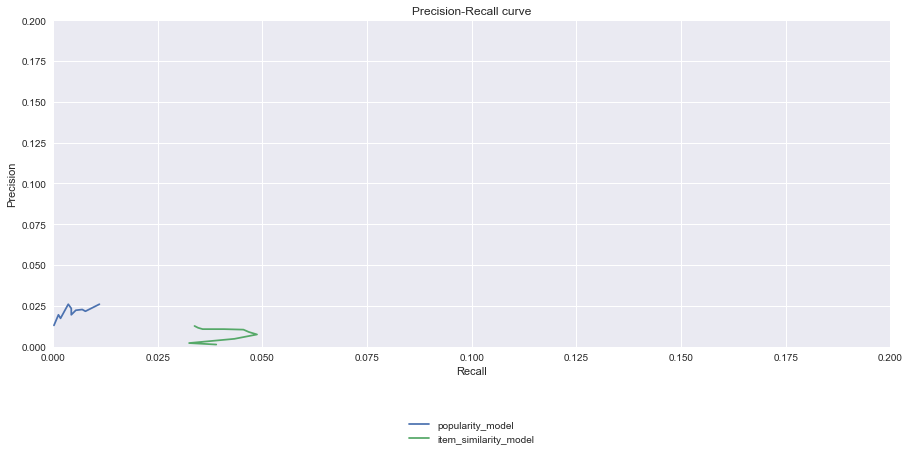

In [264]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

### Get top - K ( K = 5) recommendations.

In [425]:
df_result = pd.DataFrame()
#df_result.append(predictions)

df_result['Collaborative user recommender'] = predictions
df_result['popularity recommender'] = rm_df1['prod_id']
df_result['Collaborative Item Similarity recommender'] = rm_df2['prod_id']
df_result['user_id'] = 'A2AY4YUOX2N1BQ'
df_result

,Collaborative user recommender,popularity recommender,Collaborative Item Similarity recommender,user_id
0,B0088CJT4U,B0088CJT4U,B00BUACE8K,A2AY4YUOX2N1BQ
1,B003ES5ZUU,B007WTAJTO,B00EDCF0MY,A2AY4YUOX2N1BQ
2,B007WTAJTO,B003ES5ZUU,B009JBFOZW,A2AY4YUOX2N1BQ
3,B000N99BBC,B000N99BBC,B007VL8Y5E,A2AY4YUOX2N1BQ
4,B00829TIEK,B00829THK0,B00D4MFPLA,A2AY4YUOX2N1BQ
5,B00829THK0,B00829TIEK,B005FDXZJU,A2AY4YUOX2N1BQ
6,B004CLYEDC,B002R5AM7C,B00CMF0SO4,A2AY4YUOX2N1BQ
7,B008DWCRQW,B008DWCRQW,B00CZDT30S,A2AY4YUOX2N1BQ
8,B002WE6D44,B002SZEOLG,B0053R0WWG,A2AY4YUOX2N1BQ
9,B002R5AM7C,B004CLYEDC,B00BB6DCUC,A2AY4YUOX2N1BQ


### I would recommend top 5 based off Collaborative User Recommender

In [426]:
df_result['Collaborative user recommender'].head(5)

0    B0088CJT4U
1    B003ES5ZUU
2    B007WTAJTO
3    B000N99BBC
4    B00829TIEK
Name: Collaborative user recommender, dtype: object

### Summarizing Insights

### The results of Collaborative user recommender and popularity recommender are almost similar whereas the results of Collaborative Item Similarity recommender are different.